## tensorflow sirve para construir , entrenar redes neuronales y desifrar patrones
### keras sirbe para deep learning para crear redes neuronales, proporciona bloques modulares para luego  desarrolar proyectos complejos

In [1]:
#Sequential =solo permite que las capas se agreguen en secuencia, es un modelo basico
from tensorflow.keras.models import Sequential
#Dense sirbe para recibir una entrada unidimencionalidad en un array de la imagen, sirbe para imagenes pequenas (28x28 px) y es la PRIMERA CAPA en la red neuronal
from tensorflow.keras.layers import Dense
#usamos redes convolucion = orientadas a clasificar imagenes, es decir que tendran similitud a las redes neuronales humanas, un proceso similar a ojo humano y su proceso de tratamiento de imagenes.
#sConvolution2D =sirve para capturar imagenes, y crear datos mas digeribles para las capas posteriores, realiza operaciones entre las imagenes y el kernel
from tensorflow.keras.layers import Convolution2D
#aplica un filtro que reduce la dimencion de la imagen a tratar y dejando el valor mas grande
from tensorflow.keras.layers import MaxPooling2D
#convierte los elementos de la matriz de imagenes de entrada en un array plano. Luego, por debajo la instrucción Dense, añadimos una capa oculta (hidden layer) de la red neuronal
from tensorflow.keras.layers import Flatten

In [2]:
#opencv sirbe para vision artificial y es libre y leer las imagenes
import cv2
#numpy sirbe para crear y hacer operaciones entre vectores, listas y matrices
import numpy as np
#glob debuelve una lista con todas las rutas de los elementos almacenados alli
import glob
#os realiza operaciones dentro del sistema operativo como crear carpetas,listar contenidos de la carpeta.
import os
#proceso aleatorio, barajeo de forma aleatoria como las cartas de un casino
from random import shuffle

## '''Vemos el efecto de Sequential, anade capas unas detras de otras'''

In [3]:
#cargamos el modelo con la estructura secuencial
modelo=Sequential()

## '''1 capa entrara por una capa de convolucion de 32 kernels cada uno de 3x3'''

In [4]:
#definimos el KERNEL de 32 KERNELS de 3x3 cada uno con 224x224(tamano estandart de cada imagen que leera el programa)cada IMAGEN x3 que es la cantidad de canales RGB y por ultimo la funcion de activacion RELU(deja los valores positivos como estan y los negativos los pone en 0 por que nos dira si tiene cancer o no es RESPUESTA BINARIA)...........AHORA BIEN ESTO NOS ARROJARA SI TIENE O NO CANCER, si queremos saber si tiene lesiones o cuan grave es entonces se usa la funion de activacion softmax por que las respuestas seran mas de 2(binario)
modelo.add(Convolution2D(32,(3,3),input_shape=(224,224,3),activation='relu'))

## '''2 capa'''

In [5]:
#pool_size es una ventana de 2x2.
modelo.add(MaxPooling2D(pool_size=((2,2))))

## '''3 capa'''

In [6]:
#los datos se vuelve a un arreglo para el proseco de la red nueronal, estas seran las entradas
modelo.add(Flatten())

In [7]:
modelo.output_shape

(None, 394272)

## '''Creamos la CAPA DE ENTRADA de tipo convolucion'''

In [8]:
#se añade una capa  de 128 neuronas con la formula de relu
modelo.add(Dense(128,activation='relu'))

## '''Creamos la capa oculta de 50 neuronas'''

In [9]:
#se añade una capa  de 50 neuronas con la formula de relu
modelo.add(Dense(50,activation='relu'))

## '''La capa de SALIDA sera de una neurona (sigmoid)por que nos dira si tiene 1 o no tiene 0 cancer, si queremos valores de rango [0-0.1-0.2....1] usamos softmax eso es para saber cuan grave es la lesion'''


In [10]:
#es la capa de salida con resultado BINARIO entonces es sigmoid
modelo.add(Dense(1,activation='sigmoid'))

## Modificar el learning Rate en ADAM

In [11]:
from tensorflow import keras
opt = keras.optimizers.Adam(learning_rate=0.02)

## Modificar a sgd 

In [12]:
opt=keras.optimizers.SGD(learning_rate=0.02)
modelo.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

## Modificar a RMSprop

In [13]:
opt=keras.optimizers.RMSprop(learning_rate=0.02)
modelo.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

## Compilar el modelo modificado con el learning rate

In [14]:
#creamos la funcion para hallar el minimo optimo,funcion de perdida=crosentopia binaria,metricas que nos muestre la efectividad=acuracy
modelo.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

# '''INICIO DEL PRE PROCESAMIENTO de datos'''
### '''Creamos las listas para almacenar los metodos de entrenamiento y prueva'''

In [15]:
X_train=[]
X_test=[]
Y_test=[]
Y_train=[]
#crea una LISTA auxiliar para obtener la informacion de forma ALEATORIA para luego pasarle a la red neuronal
dataTr=[]

In [16]:
#lee todos los archivos que tenga esta extencion en esta carpeta de forma ordenada
for filename in glob.glob(os.path.join('data/train/malignant','*.jpg')):
    #guardamos en la lista primero la etiqueta 1, junto con su respectiva imagen en este caso MALIGNO
    dataTr.append([1,cv2.imread(filename)])
for filename in glob.glob(os.path.join('data/train/benign','*.jpg')):
    #se hace lo mismo pero con 0 para BENIGNO
    dataTr.append([0,cv2.imread(filename)])

In [17]:
#aqui es donde barajamos la lista, asi lo volvemos aleatorio
shuffle(dataTr)

In [18]:
len(dataTr)

2637

# '''FINAL DEL PRE PROSESAMIENTO DE DATOS'''

In [19]:
#para sacar las etiquetas y sus respectivas imagenes
for i,j in dataTr:
    #guarda las imagenes
    X_train.append(j)
    #guarda las etiquetas 0 o 1
    Y_train.append(i)

In [20]:
#pasamos de una LISTA a un array para que pueda leerlo TENSERFLOW
X_train=np.array(X_train)
Y_train=np.array(Y_train)

In [21]:
#hacemos lo mismo pero esta ves para prueva
for filename in glob.glob(os.path.join('data/test/malignant','*.jpg')):
    X_test.append(cv2.imread(filename))
    Y_test.append(1)
for filename in glob.glob(os.path.join('data/test/benign','*.jpg')):
    X_test.append(cv2.imread(filename))
    Y_test.append(0)

In [22]:
#convertimos de lista a array
X_test=np.array(X_test)
Y_test=np.array(Y_test)

# Validacion cruzada: K-Cross

In [22]:
n=int(len(dataTr)/5)
output=[dataTr[i:i + n] for i in range(0, len(dataTr), n)]
porcion1=output[0]
porcion2=output[1]
porcion3=output[2]
porcion4=output[3]
porcion5=output[4]
porcion5.extend(output[5])
print(len(porcion1),len(porcion2),len(porcion3),len(porcion4),len(porcion5))


527 527 527 527 529


In [23]:
def particion(datos):
    imagenes=[]
    etiquetas=[]
    for i,j in datos:
        imagenes.append(j)
        etiquetas.append(i)
    imagenes=np.array(imagenes)
    etiquetas=np.array(etiquetas)
    return (imagenes,etiquetas)

In [24]:
x_p1,y_p1=particion(porcion1)
x_p2,y_p2=particion(porcion2)
x_p3,y_p3=particion(porcion3)
x_p4,y_p4=particion(porcion4)
x_p5,y_p5=particion(porcion5)

In [25]:
def validacion(x_e,y_e,x_p,y_p,model,escores):
    entre=model.fit(x_e,y_e,batch_size=32,epochs=4,validation_data=(x_p,y_p))
    a=model.evaluate(x_p,y_p)
    escores.append(a[1])
    return escores

In [26]:
vector=[]
x_entre=[]
y_entre=[]
entre1=porcion4+porcion3+porcion2+porcion1
entre2=porcion5+porcion3+porcion2+porcion1
entre3=porcion5+porcion4+porcion2+porcion1
entre4=porcion5+porcion4+porcion3+porcion1
entre5=porcion5+porcion4+porcion3+porcion2

In [27]:
x_entre,y_entre=particion(entre1)
validacion(x_entre,y_entre,x_p5,y_p5,modelo,vector)
x_entre=[]
y_entre=[]
x_entre,y_entre=particion(entre2)
validacion(x_entre,y_entre,x_p4,y_p4,modelo,vector)
x_entre=[]
y_entre=[]
x_entre,y_entre=particion(entre3)
validacion(x_entre,y_entre,x_p3,y_p3,modelo,vector)
x_entre=[]
y_entre=[]
x_entre,y_entre=particion(entre4)
validacion(x_entre,y_entre,x_p2,y_p2,modelo,vector)
x_entre=[]
y_entre=[]
x_entre,y_entre=particion(entre5)
validacion(x_entre,y_entre,x_p1,y_p1,modelo,vector)

Train on 2108 samples, validate on 529 samples
Epoch 1/4
2108/2108 [==============================] - 27s 13ms/sample - loss: 38193.7761 - acc: 0.6399 - val_loss: 1.3422 - val_acc: 0.6389
Epoch 2/4
2108/2108 [==============================] - 27s 13ms/sample - loss: 21.4188 - acc: 0.6399 - val_loss: 0.7427 - val_acc: 0.4650
Epoch 3/4
2108/2108 [==============================] - 27s 13ms/sample - loss: 4132.3117 - acc: 0.6072 - val_loss: 0.7969 - val_acc: 0.6503
Epoch 4/4
529/529 [==============================] - 1s 2ms/sample - loss: 0.6532 - acc: 0.6465
Train on 2110 samples, validate on 527 samples
Epoch 1/4
2110/2110 [==============================] - 27s 13ms/sample - loss: 50.4804 - acc: 0.6739 - val_loss: 0.6560 - val_acc: 0.6603
Epoch 2/4
2110/2110 [==============================] - 27s 13ms/sample - loss: 7.1067 - acc: 0.5953 - val_loss: 0.7100 - val_acc: 0.5939
Epoch 3/4
2110/2110 [==============================] - 27s 13ms/sample - loss: 6059.7088 - acc: 0.5962 - val_loss: 1

[0.64650285, 0.6963947, 0.56356734, 0.68311197, 0.54648954]

In [28]:
media = np.mean(vector)
desviacion_estandart = np.std(vector)
print(vector)
print("se tenie que como media el valor: "+str(media))
print("se tenie que como desviacion estandart: "+str(desviacion_estandart))

[0.64650285, 0.6963947, 0.56356734, 0.68311197, 0.54648954]
se tenie que como media el valor: 0.62721324
se tenie que como desviacion estandart: 0.061400235


# entrenando el modelo

In [23]:
#la base de datos se pasara 4 veces, por que si aumentamos sera mejor por que el sistema estaria aprendiendo mas de los datos pero muy lento,,,,,,, valitadion nos sirve para validar una prueba, cada ves que pase una base de datos(epoca)muestra la efectividad de entrenmiento y de prueba
entrenado=modelo.fit(X_train,Y_train,batch_size=32,epochs=4,validation_data=(X_test,Y_test))

Train on 2637 samples, validate on 660 samples
Epoch 1/4
2637/2637 [==============================] - 768s 291ms/sample - loss: 196.0838 - accuracy: 0.5370 - val_loss: 0.6890 - val_accuracy: 0.5455
Epoch 2/4
2637/2637 [==============================] - 4s 1ms/sample - loss: 0.6894 - accuracy: 0.5461 - val_loss: 0.6891 - val_accuracy: 0.5455
Epoch 3/4
2637/2637 [==============================] - 4s 1ms/sample - loss: 0.6891 - accuracy: 0.5461 - val_loss: 0.6891 - val_accuracy: 0.5455
Epoch 4/4
2637/2637 [==============================] - 4s 1ms/sample - loss: 0.6897 - accuracy: 0.5461 - val_loss: 0.6891 - val_accuracy: 0.5455


###  *loss = funcion de costo que la minimiza, mientras mas pequeno significa que ha minimizado el error que utiliza la tecnica desenso de gradiente, minimiza el error mirando el gtradiente del mismo error
###  *accuracy = efectividad de entrenamiento, cada epoca la efectividad aumenta
###  *val_accuracy= es lo mismo que loss pero para los datos de prueba
###  *val_accuracy= es la efectividad pero para los DATOS DE PRUEBA en cada epoca aumenta

In [56]:
ruta='data/test/malignant/375.jpg'
I=cv2.imread(ruta)
#lo volvemos para que pueda ser procesado y preguntamos si tiene etiqueta 1(es cancer)
if round(modelo.predict(np.array([I]))[0][0])==1:
    print("La lesion es cancer")
    cv2.imshow("Cancer",I)
else:
    print("La lesion es Benigna")
    cv2.imshow("Benigna",I)

La lesion es cancer


In [57]:
print(modelo.predict(np.array([I]))[0][0])

0.74292225


In [58]:
print(modelo.predict(np.array([I])))

[[0.74292225]]


In [29]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 394272)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               50466944  
_________________________________________________________________
dense_1 (Dense)              (None, 50)                6450      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 50,474,341
Trainable params: 50,474,341
Non-trainable params: 0
____________________________________________

In [30]:
modelo.evaluate(X_test,Y_test)

660/660 [==============================] - 1s 2ms/sample - loss: 0.6731 - acc: 0.5985


[0.6731452819072838, 0.5984849]

In [31]:
modelo.evaluate(X_train,Y_train)

2637/2637 [==============================] - 6s 2ms/sample - loss: 0.6984 - acc: 0.5916


[0.6984003120450573, 0.59158134]

In [32]:
accuracy = entrenado.history['acc']
val_accuracy = entrenado.history['val_acc']
loss = entrenado.history['loss']
val_loss = entrenado.history['val_loss']
epochs = range(len(accuracy))

In [34]:
print(accuracy)
print(val_accuracy)
print(loss)
print(val_loss)

[0.6025787, 0.71710277, 0.66287446, 0.58210087]
[0.6787879, 0.719697, 0.41969696, 0.5984849]
[148836.52510129136, 1.8552934501064424, 40.414374140590986, 5.7183968169606905]
[2.0957083600940125, 0.6985564759283355, 2.898837492682717, 0.6731452739599979]


In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

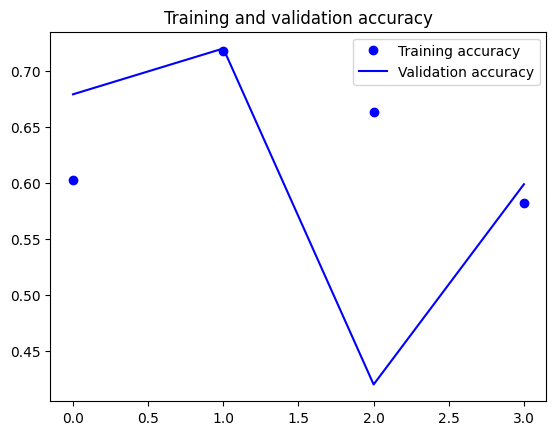

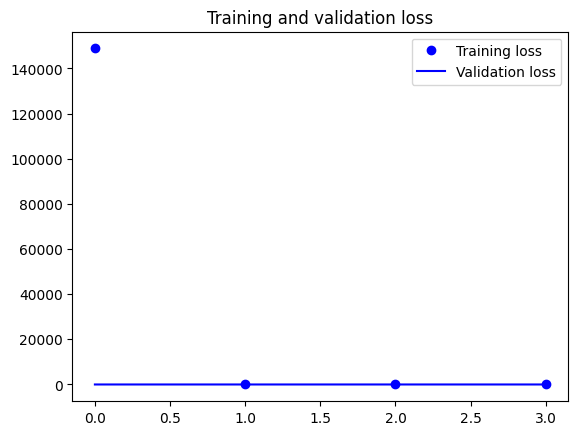

In [36]:
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Muestra las clases y su prediccion

In [48]:
predicted_classes2 = modelo.predict(X_test)

In [49]:
print(predicted_classes2.shape)

(660, 1)


In [50]:
print(predicted_classes2)

[[0.68179005]
 [0.48219582]
 [0.48219582]
 [0.48219582]
 [0.48219582]
 [0.48219582]
 [0.48219582]
 [0.48219582]
 [0.48219582]
 [0.48219582]
 [0.48219582]
 [0.48219582]
 [0.48219582]
 [0.48219582]
 [0.48219582]
 [0.48219582]
 [0.48219582]
 [0.48219582]
 [0.48219582]
 [0.48219582]
 [0.48219582]
 [0.48219582]
 [0.48219582]
 [0.48219582]
 [0.48219582]
 [0.48219582]
 [0.48219582]
 [0.48219582]
 [0.94543564]
 [0.4932787 ]
 [0.48219582]
 [0.48219582]
 [0.48219582]
 [0.48219582]
 [0.48219582]
 [0.48219582]
 [0.48219582]
 [0.48219582]
 [0.48219582]
 [0.48219582]
 [0.99938536]
 [0.48219582]
 [0.48219582]
 [0.48219582]
 [0.48219582]
 [0.48219582]
 [0.48219582]
 [0.48219582]
 [0.48219582]
 [0.48219582]
 [0.48219582]
 [0.48219582]
 [0.48219582]
 [0.48219582]
 [0.48219582]
 [0.48219582]
 [0.48219582]
 [0.48219582]
 [0.48219582]
 [0.48219582]
 [0.48219582]
 [0.48219582]
 [0.48219582]
 [0.48219582]
 [0.48219582]
 [0.48219582]
 [0.48219582]
 [0.48219582]
 [0.9999999 ]
 [0.48219582]
 [0.48219582]
 [0.95

In [51]:
predicted_classes=[]
for predicted_sport in predicted_classes2:
    predicted_classes.append(predicted_sport.tolist().index(max(predicted_sport)))
predicted_classes=np.array(predicted_classes)

In [52]:
predicted_classes.shape, Y_test.shape

((660,), (660,))

In [56]:
print(predicted_classes)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [1]:
#pip install mlxtend

In [2]:
#pip install keras

In [5]:
#pip install keras.models

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Desktop\.conda\envs\TESIS\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Desktop\AppData\Local\Temp\ipykernel_14364\1877281056.py", line 4, in <module>
    from keras.models import load_model
  File "C:\Users\Desktop\.conda\envs\TESIS\lib\site-packages\keras\__init__.py", line 21, in <module>
    from keras import models
  File "C:\Users\Desktop\.conda\envs\TESIS\lib\site-packages\keras\models\__init__.py", line 18, in <module>
    from keras.engine.functional import Functional
  File "C:\Users\Desktop\.conda\envs\TESIS\lib\site-packages\keras\engine\functional.py", line 26, in <module>
    from keras import backend
  File "C:\Users\Desktop\.conda\envs\TESIS\lib\site-packages\keras\backend.py", line 32, in <module>
    from keras import backend_config
  File "C:\Users\Desktop\.conda\envs\TESIS\lib\site-packages\keras\backend_config.py",

In [7]:
names = ['carcinoma','melanoma']

In [ ]:
test_datagen = ImageDataGenerator()
test_data_dir='D:/UMSA/Documentos/CNN cancer de piel/data/test'

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Desktop\.conda\envs\TESIS\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Desktop\AppData\Local\Temp\ipykernel_10460\1090509027.py", line 1, in <module>
    test_datagen = ImageDataGenerator()
NameError: name 'ImageDataGenerator' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Desktop\.conda\envs\TESIS\lib\site-packages\IPython\core\interactiveshell.py", line 2077, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Desktop\.conda\envs\TESIS\lib\site-packages\IPython\core\ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of

In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(224, 224), 
    batch_size = 32,
    class_mode='binary', 
    shuffle=False)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Desktop\.conda\envs\TESIS\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Desktop\AppData\Local\Temp\ipykernel_14128\3776765021.py", line 1, in <module>
    test_generator = test_datagen.flow_from_directory(
NameError: name 'test_datagen' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Desktop\.conda\envs\TESIS\lib\site-packages\IPython\core\interactiveshell.py", line 2077, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Desktop\.conda\envs\TESIS\lib\site-packages\IPython\core\ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, 

In [ ]:
custom_Model= entrenado
type(custom_Model)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Desktop\.conda\envs\TESIS\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Desktop\AppData\Local\Temp\ipykernel_14128\3390944643.py", line 1, in <module>
    custom_Model= entrenado
NameError: name 'entrenado' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Desktop\.conda\envs\TESIS\lib\site-packages\IPython\core\interactiveshell.py", line 2077, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Desktop\.conda\envs\TESIS\lib\site-packages\IPython\core\ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb

In [ ]:
predictions = modelo.predict_generator(generator=test_generator)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Desktop\.conda\envs\TESIS\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Desktop\AppData\Local\Temp\ipykernel_14128\1693320477.py", line 1, in <module>
    predictions = modelo.predict_generator(generator=test_generator)
NameError: name 'modelo' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Desktop\.conda\envs\TESIS\lib\site-packages\IPython\core\interactiveshell.py", line 2077, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Desktop\.conda\envs\TESIS\lib\site-packages\IPython\core\ultratb.py", line 1101, in get_records
    return _fixed_getinnerfram

In [ ]:
y_pred = np.argmax(predictions, axis=1)
y_real = test_generator.classes
y_real

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Desktop\.conda\envs\TESIS\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Desktop\AppData\Local\Temp\ipykernel_14128\1110750588.py", line 1, in <module>
    y_pred = np.argmax(predictions, axis=1)
NameError: name 'np' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Desktop\.conda\envs\TESIS\lib\site-packages\IPython\core\interactiveshell.py", line 2077, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Desktop\.conda\envs\TESIS\lib\site-packages\IPython\core\ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_co

In [ ]:
matc=confusion_matrix(y_real, y_pred)

plot_confusion_matrix(conf_mat=matc, figsize=(5,5), class_names = names, show_normed=False)
plt.tight_layout()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Desktop\.conda\envs\TESIS\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Desktop\AppData\Local\Temp\ipykernel_14128\469653699.py", line 1, in <module>
    matc=confusion_matrix(y_real, y_pred)
NameError: name 'y_real' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Desktop\.conda\envs\TESIS\lib\site-packages\IPython\core\interactiveshell.py", line 2077, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Desktop\.conda\envs\TESIS\lib\site-packages\IPython\core\ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_c

In [ ]:
print(metrics.classification_report(y_real,y_pred, digits = 4))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Desktop\.conda\envs\TESIS\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Desktop\AppData\Local\Temp\ipykernel_14128\4205964833.py", line 1, in <module>
    print(metrics.classification_report(y_real,y_pred, digits = 4))
NameError: name 'y_real' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Desktop\.conda\envs\TESIS\lib\site-packages\IPython\core\interactiveshell.py", line 2077, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Desktop\.conda\envs\TESIS\lib\site-packages\IPython\core\ultratb.py", line 1101, in get_records
    return _fixed_getinnerframe